In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataEvents = pd.read_csv("/home/federico/7506/Finger/fiuba-trocafone-tp1-final-set/events.csv") #defino el frame dataEvents con el frame dado por el finger
dataEvents.head(20) # muestra todos los datos del dataFrame

/home/federico/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0


In [5]:
dataEvents.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

In [6]:
dataEvents.dropna(subset = ['event'], inplace = True)


In [23]:
#Quiero ver cuál es el evento más común para cada modelo
dataEvents.dropna(subset = ['model'], inplace = True)

modelGrouped = dataEvents.groupby(['model', 'event'])
modelData = pd.DataFrame(modelGrouped.size().reset_index('event'))

modelData.rename(columns = {0 : 'cantidad por evento'}, inplace = True )

In [12]:
#Se entiende que todos los productos van a ser vistos antes de hacer nada,
#por lo que el hecho de que viewed product sea el evento más común no dice nada interesante.
#Por otra parte puedo analizar cuál es el producto que más eventos, distintos a viewed product, tiene frente a la cantidad
#de eventos viewed product de ese mismo producto, para analizar la confiabilidad que presenta el producto en cuestión

In [41]:
modelosOrdenados = dataEvents['model'].value_counts().index.tolist()
modelList = dataEvents[dataEvents['model'].isin(modelosOrdenados)].groupby(['model','event']).size()
modelList = modelList.to_frame()
modelList.head(10)

0
model                     event              
Asus Live                 viewed product    4
Asus Zenfone 2            checkout          4
                          viewed product  138
Asus Zenfone 2 Deluxe     checkout          2
                          viewed product  201
Asus Zenfone 2 Laser      viewed product   12
Asus Zenfone 3 Max  32 GB checkout          8
                          viewed product  124
Asus Zenfone 3 Max 16 GB  checkout         29
                          conversion        1

In [63]:
modelListPivoted = modelList.pivot_table(index = "model", columns = "event", values = 0, aggfunc = 'first')
modelListPivoted = modelListPivoted[['viewed product', 'lead', 'conversion', 'checkout']]
modelListPivoted.sort_values(by='viewed product', ascending = False)

event,viewed product,lead,conversion,checkout
model,,,,
iPhone 6,47538.0,12.0,71.0,3295.0
iPhone 5s,42045.0,5.0,84.0,2744.0
iPhone 6S,36930.0,21.0,37.0,2308.0
iPhone 7,26330.0,5.0,16.0,1205.0
Samsung Galaxy S7 Edge,23062.0,4.0,17.0,843.0
Samsung Galaxy S7,18085.0,NaN,18.0,1234.0
iPhone 7 Plus,17853.0,9.0,6.0,924.0
iPhone SE,15874.0,5.0,17.0,635.0
Samsung Galaxy S8,15868.0,2.0,15.0,1074.0


In [177]:
modelCheckoutToViews = modelListPivoted[['viewed product', 'checkout']]
modelLeadToViews = modelListPivoted[['viewed product', 'lead']]
modelConvertionToViews = modelListPivoted[['viewed product', 'conversion']]
modelConvertionToViews.head(9)

event,viewed product,conversion
model,,
Asus Live,4.0,NaN
Asus Zenfone 2,138.0,NaN
Asus Zenfone 2 Deluxe,201.0,NaN
Asus Zenfone 2 Laser,12.0,NaN
Asus Zenfone 3 Max 32 GB,124.0,NaN
Asus Zenfone 3 Max 16 GB,141.0,1.0
Asus Zenfone 3 Zoom,42.0,NaN
Asus Zenfone 5,720.0,1.0
Asus Zenfone 6,583.0,NaN


In [178]:
modelCheckoutToViewsRatio = modelCheckoutToViews[['checkout']].div(modelCheckoutToViews['viewed product'], axis=0) 
modelCheckoutToViewsRatio.head(20)

event,checkout
model,
Asus Live,NaN
Asus Zenfone 2,0.028986
Asus Zenfone 2 Deluxe,0.009950
Asus Zenfone 2 Laser,NaN
Asus Zenfone 3 Max 32 GB,0.064516
Asus Zenfone 3 Max 16 GB,0.205674
Asus Zenfone 3 Zoom,0.047619
Asus Zenfone 5,0.011111
Asus Zenfone 6,0.012007


In [197]:
modelCheckoutToViewsRatio['viewed product'] = modelCheckoutToViews['viewed product']
modelCheckoutToViewsRatio = modelCheckoutToViewsRatio.rename(columns ={'checkout' : 'checkout sobre vistas'})
modelCheckoutToViewsRatioOrderedByViews = modelCheckoutToViewsRatio.sort_values(by = 'viewed product', ascending = False)

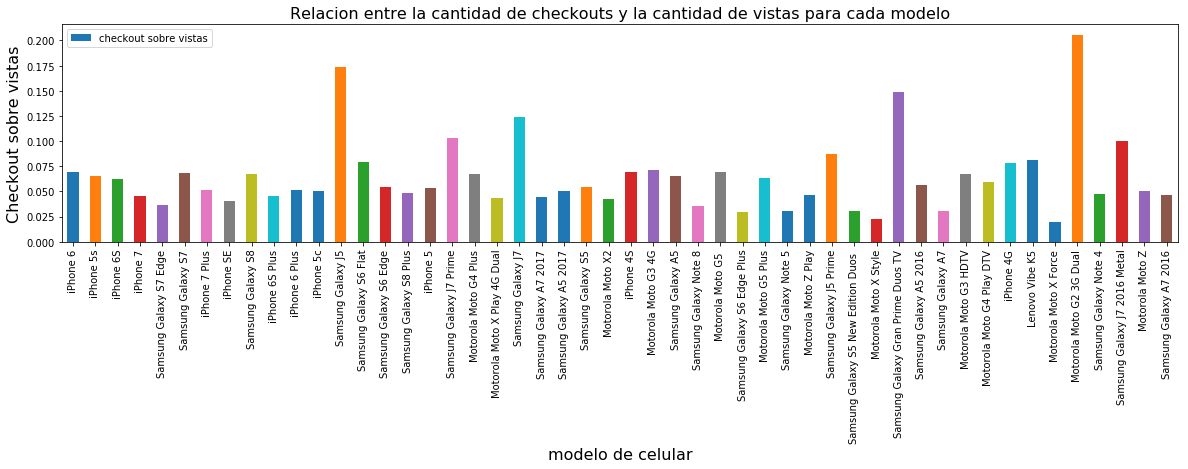

In [199]:
vistasQueMasHicieronCheckoutPlot = modelCheckoutToViewsRatioOrderedByViews.head(50).plot(kind = 'bar', y = 'checkout sobre vistas', figsize = (20,4))
vistasQueMasHicieronCheckoutPlot.set_xlabel("modelo de celular", fontsize = 16)
vistasQueMasHicieronCheckoutPlot.set_ylabel("Checkout sobre vistas", fontsize = 16)
vistasQueMasHicieronCheckoutPlot.set_title("Relacion entre la cantidad de checkouts y la cantidad de vistas para cada modelo",fontsize = 16)
plt.show()

In [170]:
modelLeadToViews
modelLeadToViewsRatio = modelLeadToViews[['lead']].div(modelLeadToViews['viewed product'], axis=0) 
modelLeadToViewsRatio.head(20)

modelLeadToViewsRatio['viewed product'] = modelCheckoutToViews['viewed product']
modelLeadToViewsRatio = modelLeadToViewsRatio.rename(columns ={'lead' : 'lead sobre vistas'})
modelLeadToViewsRatioOrderedByViews = modelLeadToViewsRatio.sort_values(by = 'viewed product', ascending = False)

modelLeadToViewsRatioOrderedByViews.head(20)

event,lead sobre vistas,viewed product
model,,
iPhone 6,0.000252,47538.0
iPhone 5s,0.000119,42045.0
iPhone 6S,0.000569,36930.0
iPhone 7,0.000190,26330.0
Samsung Galaxy S7 Edge,0.000173,23062.0
Samsung Galaxy S7,NaN,18085.0
iPhone 7 Plus,0.000504,17853.0
iPhone SE,0.000315,15874.0
Samsung Galaxy S8,0.000126,15868.0


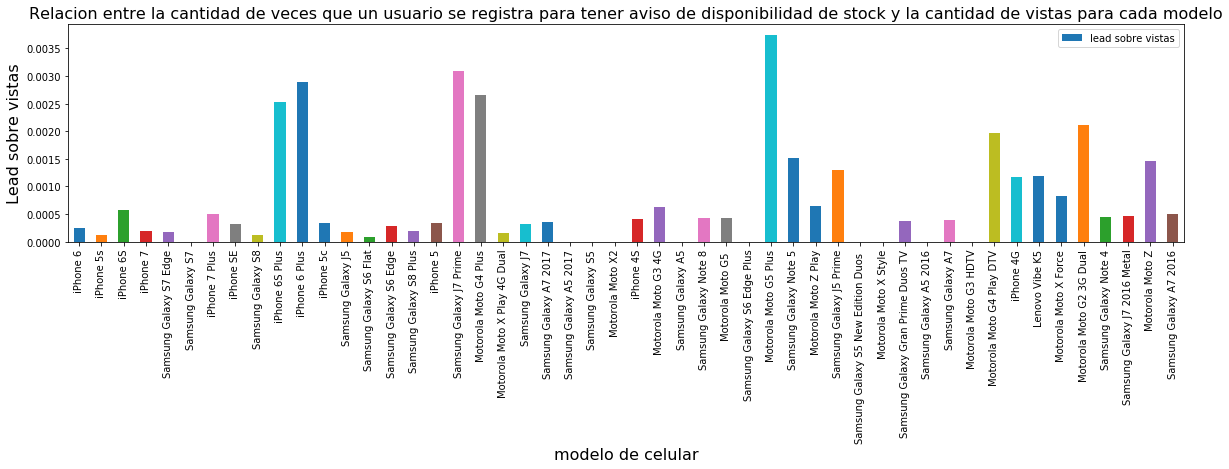

In [194]:
vistasQueMasHicieronLeadPlot = modelLeadToViewsRatioOrderedByViews.head(50).plot(kind = 'bar', y = 'lead sobre vistas', figsize = (20,4))
vistasQueMasHicieronLeadPlot.set_xlabel("modelo de celular", fontsize = 16)
vistasQueMasHicieronLeadPlot.set_ylabel("Lead sobre vistas", fontsize = 16)
vistasQueMasHicieronLeadPlot.set_title("Relacion entre la cantidad de veces que un usuario se registra para tener aviso de disponibilidad de stock y la cantidad de vistas para cada modelo",fontsize = 16)
plt.show()

In [189]:
modelConvertionToViewsRatio = modelConvertionToViews[['conversion']].div(modelConvertionToViews['viewed product'], axis=0) 

modelConvertionToViewsRatio['viewed product'] = modelConvertionToViews['viewed product']
modelConvertionToViewsRatio = modelConvertionToViewsRatio.rename(columns ={'conversion' : 'conversion sobre vistas'})
modelConvertionToViewsRatioOrderedByViews = modelConvertionToViewsRatio.sort_values(by = 'viewed product', ascending = False)

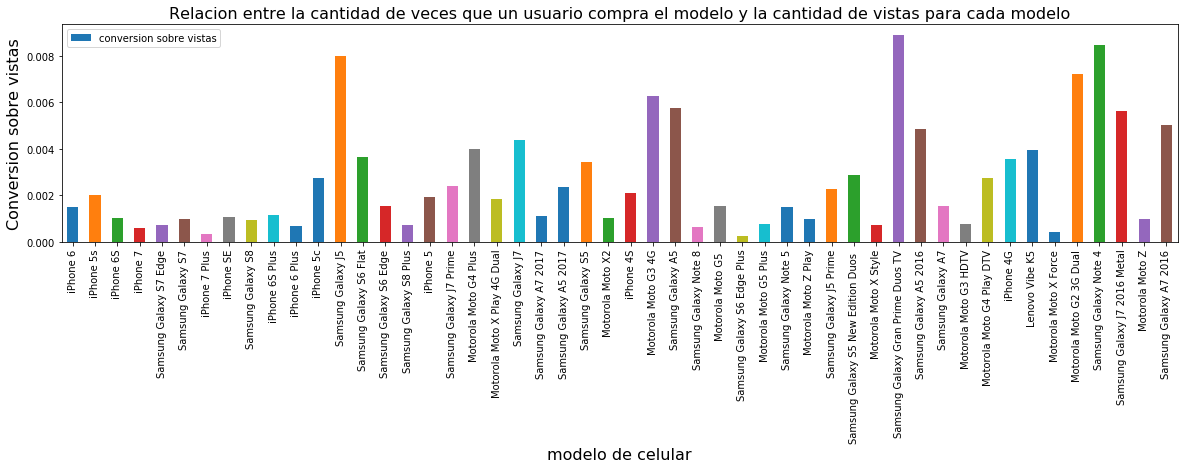

In [193]:
vistasQueMasHicieronConversionPlot = modelConvertionToViewsRatioOrderedByViews.head(50).plot(kind = 'bar', y = 'conversion sobre vistas', figsize = (20,4))
vistasQueMasHicieronConversionPlot.set_xlabel("modelo de celular", fontsize = 16)
vistasQueMasHicieronConversionPlot.set_ylabel("Conversion sobre vistas", fontsize = 16)
vistasQueMasHicieronConversionPlot.set_title("Relacion entre la cantidad de veces que un usuario compra el modelo y la cantidad de vistas para cada modelo",fontsize = 16)
plt.show()

In [207]:
modelConvertionToCheckouts = modelListPivoted[['checkout', 'conversion']]
modelConvertionToCheckouts.dropna(subset = ['checkout'], inplace = True)

/home/federico/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [213]:
modelConvertionToCheckoutRatio = modelConvertionToCheckouts[['conversion']].div(modelConvertionToCheckouts['checkout'], axis=0) 

modelConvertionToCheckoutRatio['checkout'] = modelConvertionToCheckouts['checkout']
modelConvertionToCheckoutRatio = modelConvertionToCheckoutRatio.rename(columns ={'conversion' : 'conversion sobre checkout'})
modelConvertionToCheckoutRatioOrderedByCheckout = modelConvertionToCheckoutRatio.sort_values(by = 'checkout', ascending = False)
modelConvertionToCheckoutRatioOrderedByCheckout

event,conversion sobre checkout,checkout
model,,
iPhone 6,0.021548,3295.0
iPhone 5s,0.030612,2744.0
iPhone 6S,0.016031,2308.0
Samsung Galaxy J5,0.045881,1918.0
Samsung Galaxy S7,0.014587,1234.0
iPhone 7,0.013278,1205.0
Samsung Galaxy S8,0.013966,1074.0
iPhone 7 Plus,0.006494,924.0
Samsung Galaxy J7 Prime,0.023095,866.0


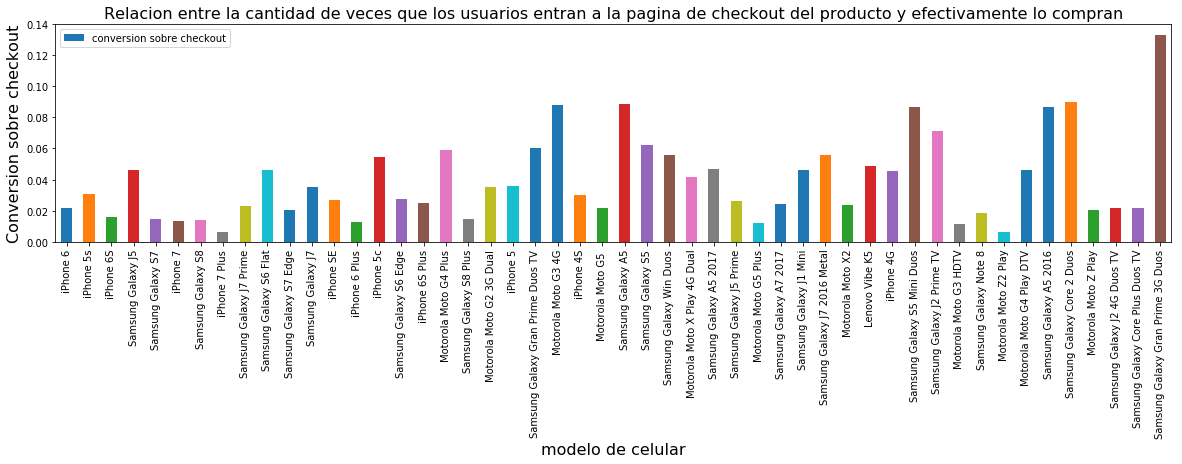

In [215]:
checkoutsQueMasHicieronConversionPlot = modelConvertionToCheckoutRatioOrderedByCheckout.head(50).plot(kind = 'bar', y = 'conversion sobre checkout', figsize = (20,4))
checkoutsQueMasHicieronConversionPlot.set_xlabel("modelo de celular", fontsize = 16)
checkoutsQueMasHicieronConversionPlot.set_ylabel("Conversion sobre checkout", fontsize = 16)
checkoutsQueMasHicieronConversionPlot.set_title("Relacion entre la cantidad de veces que los usuarios entran a la pagina de checkout del producto y efectivamente lo compran",fontsize = 16)
plt.show()